In [8]:
import numpy as np
import matplotlib.pyplot as plt
        
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Example 3: Network of Coupled Circadian Oscillators

In this example we will simulate a population of coupled circadian oscillators. This simulation is considerably more complex than the previous two examples. We will overcome this problem by using an existing template of a single circadian oscillator available within GeneSSA. This oscillator is based upon a proposed model of the Per-Tim clock network in Drosophila (Gonze et al. 2003).

[1] Gonze, Didier, et al. "Stochastic models for circadian rhythms: effect of molecular noise on periodic and chaotic behaviour." Comptes rendus biologies 326.2 (2003): 189-203.

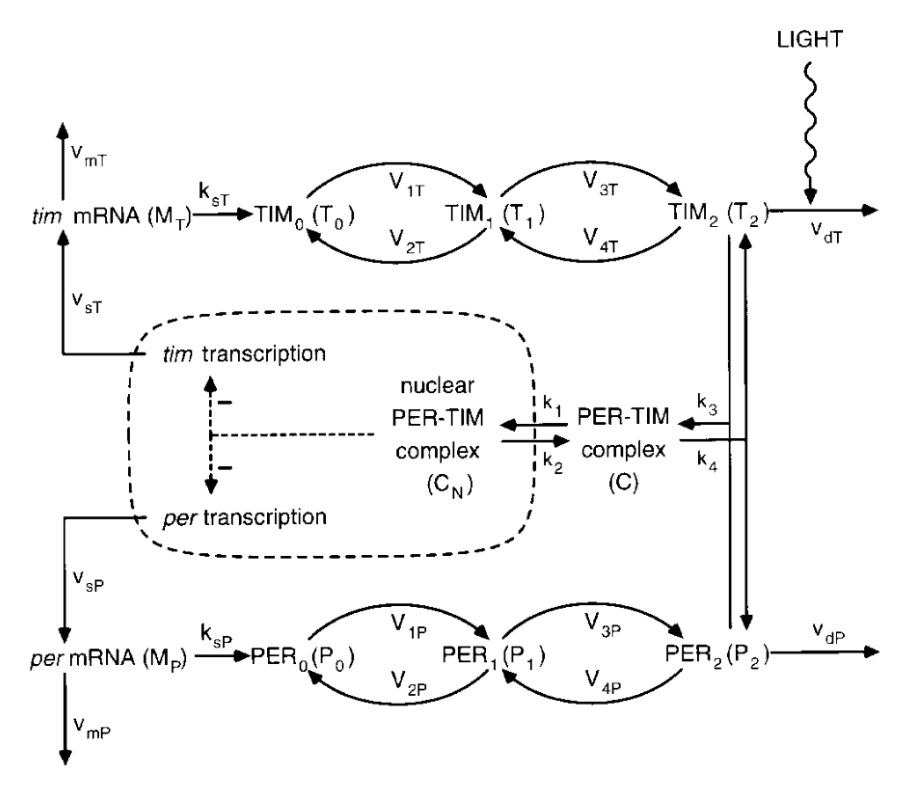

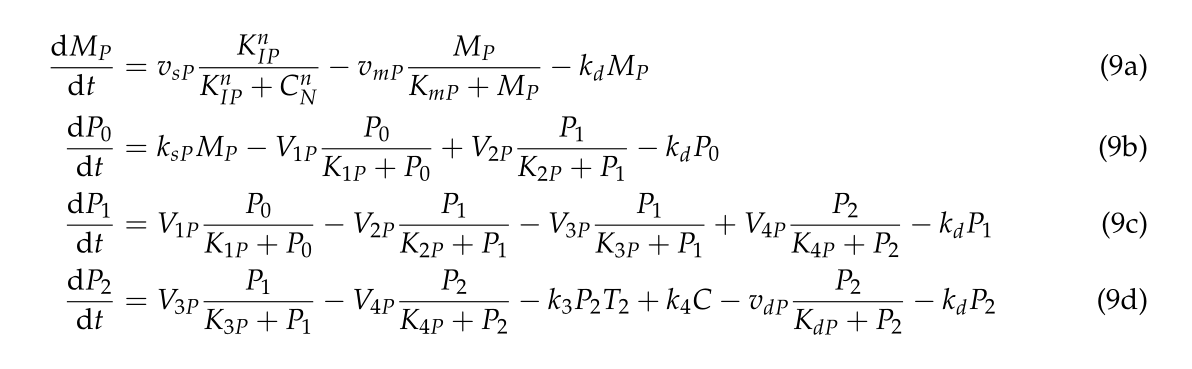

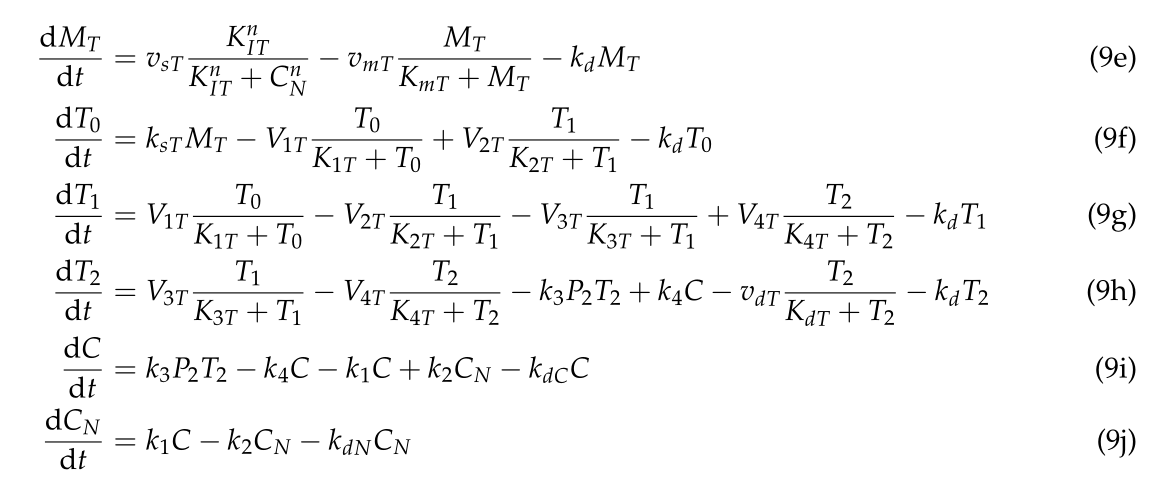

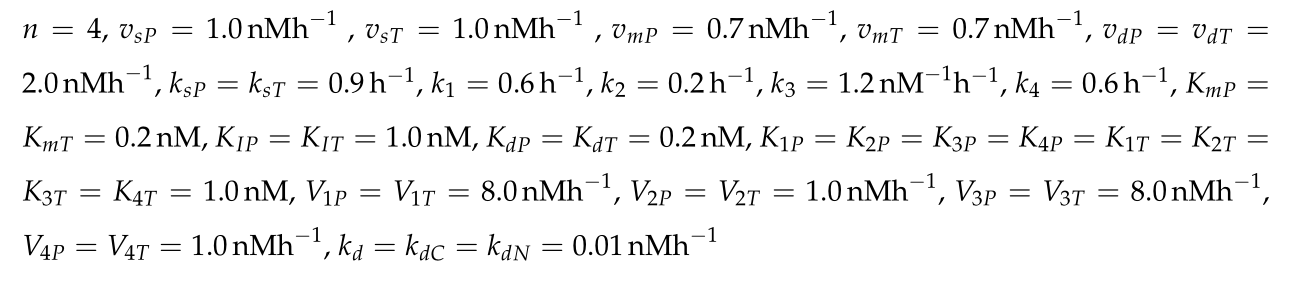

## Example 3.1: Simulating an individual oscillator

First we will simulate a single oscillator operating in isolation.

### Creating an individual Per-Tim oscillator

We can use GeneSSA to instantiate an individual oscillator. The `transcription` parameter indicates whether or not we should include constitutive transcription of per and tim transcripts, while the `omega` parameter sets the approximate magnitude of Per and Tim protein levels.

In [21]:
from genessa.demo.oscillators import Oscillator

oscillator = Oscillator(transcription=True, omega=1)

The `Oscillator` class inherits from the `Network` class. All `Network` instances provide a `__repr__` attribute that provide a quick summary of all the reactions in the network. This allows us to quickly inspect each of the 30 reactions in our individual oscillator.

In [22]:
oscillator

            Rxn               Reactants    Products         Propensity              Parameter
---------------------------  -----------  ----------  -----------------------  -------------------
          p decay                 0                             [0]                  0.01000
      P0 translation                          1                 [0]                  0.90000
         P0 decay                 1                             [1]                  0.01000
          t decay                 2                             [2]                  0.01000
      T0 translation                          3                 [2]                  0.90000
         T0 decay                 3                             [3]                  0.01000
    P0 transcript deg.            0                      1 / (1 + 0.2/[0])           0.70000
    T0 transcript deg.            2                      1 / (1 + 0.2/[2])           0.70000
    P0 phosphorylation            1           4          1 / (1

### Simulating an individual Per-Tim oscillator

We can now run our simulation as we did before, then plot the resultant dynamics of the nuclear Per-Tim complex ($nC$). The `Oscillator.proteins` attribute provides a dictionary that maps species names, such as $nC$, to dimensions of the state space.

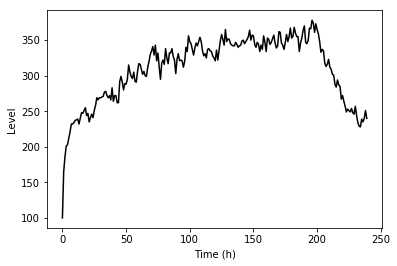

In [19]:
from genessa.solver.stochastic import MonteCarloSimulation

# define an initial condition
ic = np.ones(oscillator.N)*100

# run simulation
simulation = MonteCarloSimulation(oscillator, ic=ic)
timeseries = simulation.run(N=1, duration=240, dt=1)

# create figure
fig, ax = plt.subplots()
ax.set_xlabel('Time (h)')
ax.set_ylabel('Level')

# plot trajectories
species = 'nC'
dimension = oscillator.proteins[species]
for trajectory in timeseries.states[:, dimension, :]:
    ax.plot(timeseries.t, trajectory, '-k')

## Example 3.2: Simulating a network of coupled oscillators

We will now extend our simulation to a network of coupled oscillators. Oscillators are coupled by their transcription rates as detailed by Gonze et al.:

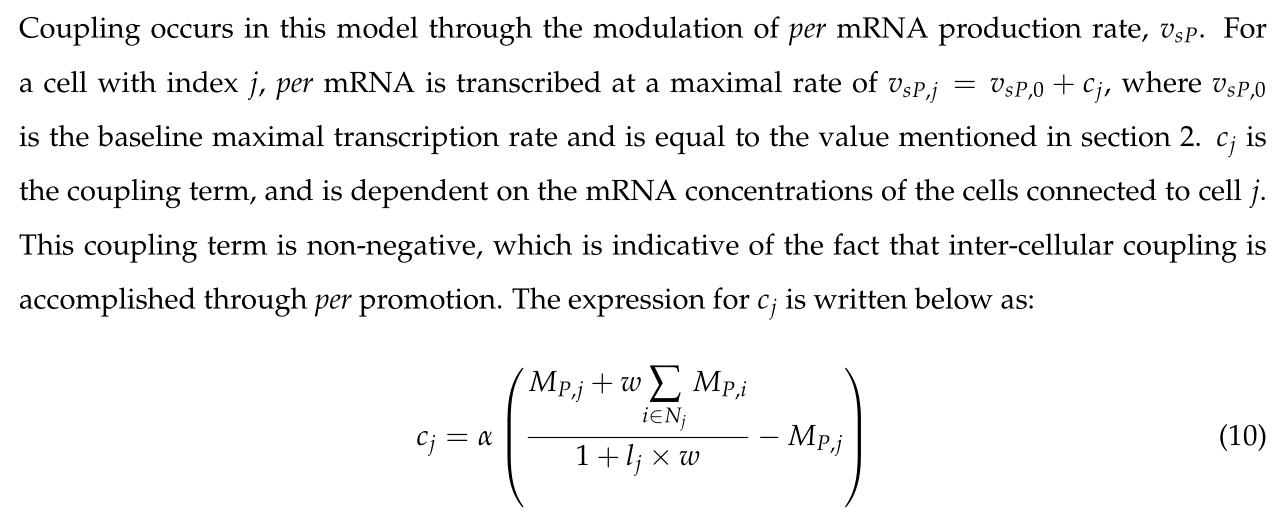

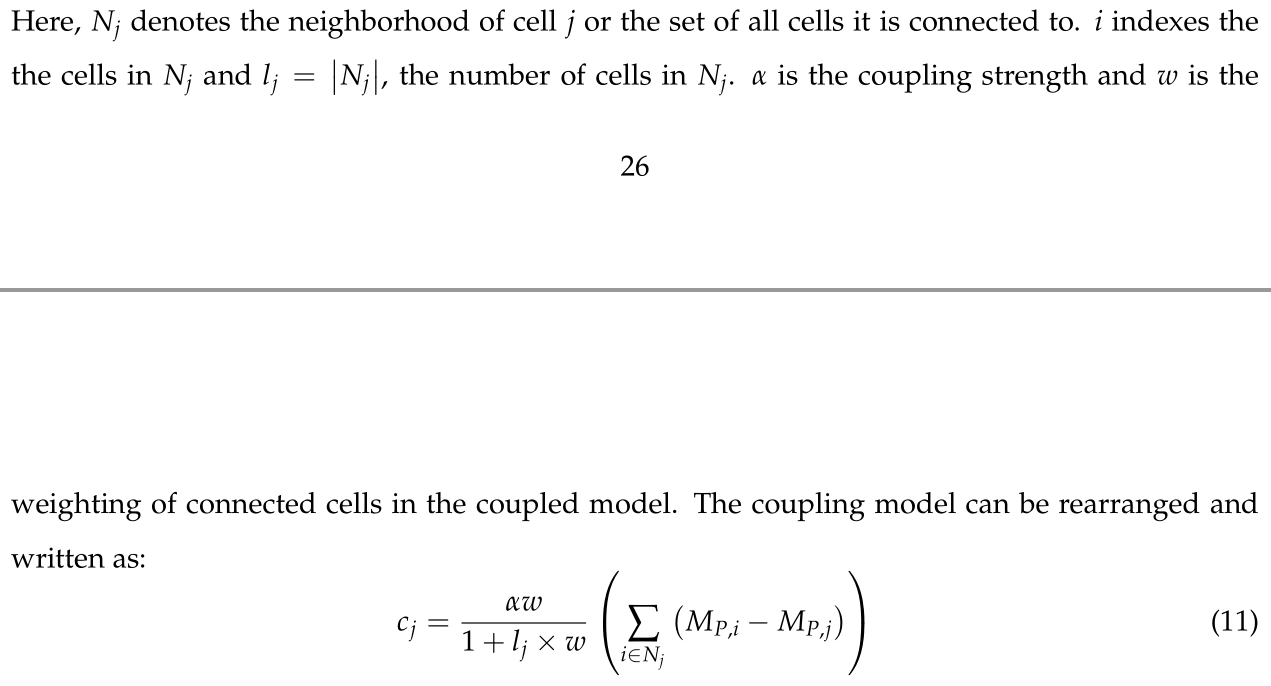

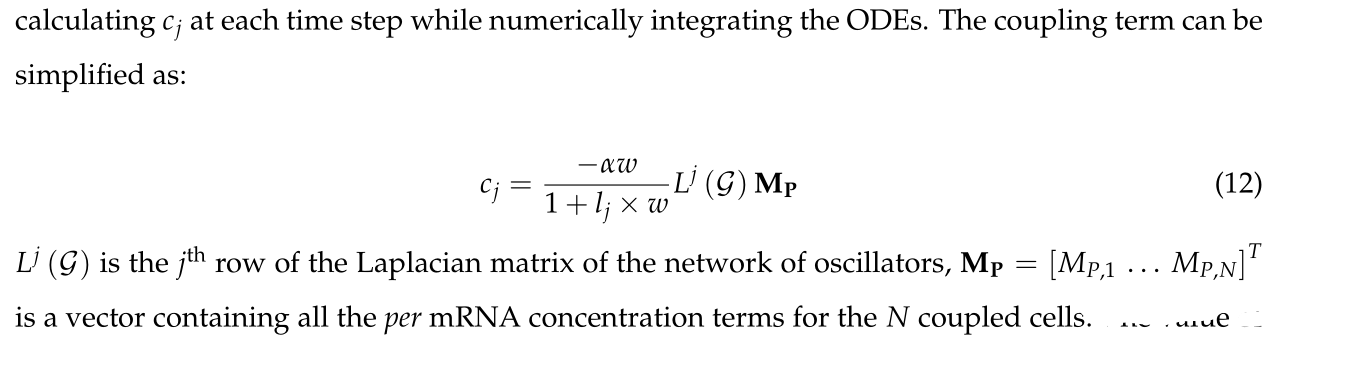

### Creating a population of Per-Tim oscillators

GeneSSA offers a `CoupledOscillators` template for this purpose. The `replicates` parameter defines the number of oscillators in the network.

In [25]:
from genessa.demo.oscillators import CoupledOscillators

# instantiate system of coupled oscillators
network = CoupledOscillators(omega=100, replicates=5)

### Adding transcriptional coupling to the network

Oscillators are coupled by providing an adjacency matrix for the network. GeneSSA also provides methods for quick addition of some common coupling strategies. These include a random coupling in which edges are randomly generated, and a dense coupling in which the network is fully connected. We will add a random coupling using the `CoupledOscillators.add_random_coupling` method. The `a` parameter determines the coupling strength, and is equivalent to $\alpha$ in the model above.


In [26]:
network.add_random_coupling(a=0.01)

### Run stochastic simulation

We will now run our simulation as we did before.

In [28]:
from genessa.solver.stochastic import MonteCarloSimulation

# run simulation
ic = np.ones(network.N)*100
simulation = MonteCarloSimulation(network, ic=ic)
timeseries = simulation.run(N=1, duration=24*10, dt=1)

### Plot simulated dynamics of nuclear Per-Tim complex

Note that the `CoupledOscillators.proteins` attribute provides a dictionary of dictionaries mapping species names to their state space dimensions. This is because each cell in the network has its own list of species.

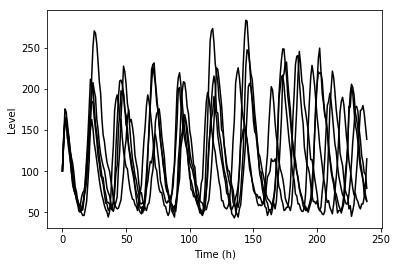

In [30]:
# create figure
fig, ax = plt.subplots()
ax.set_xlabel('Time (h)')
ax.set_ylabel('Level')

# plot trajectories
species = 'nC'
for p in network.proteins.values():
    ax.plot(timeseries.t, timeseries.states[0, p[species], :], '-k')